# Domaći zadatak - Mushroom classification

### *Studenti: Milica Spasić - br. indeksa 1207, Irena Đorđević - br. indeksa 1048*

Za prvi domaći izabran je skup podataka koji opisuje pečurke i nalazi se na linku: https://archive.ics.uci.edu/ml/datasets/mushroom.
Cilj je utvrditi da li je pečurka jestiva ili ne.

## 1. Učitavanje, analiza, i priprema podataka

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif
from sklearn.ensemble import *
from sklearn.linear_model import *

Svi atributi skupa podataka su kategoričke vrednosti i prikazani su u nastavku:

In [2]:
header = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [3]:
data = pd.read_csv("agaricus-lepiota.data", names=header)

In [4]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


U nastavku je prikazana deskriptivna analiza ovih kategoričkih atributa.

In [5]:
data.describe(include = "all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:

def features_countplot(df):
    fig, axs = plt.subplots(6, 4, figsize=(25,30), constrained_layout=True)
    for i, f in enumerate(df.columns):
        sns.countplot(x=f, data=df, ax=axs[i//4][i%4], palette="Set2")
    plt.show()

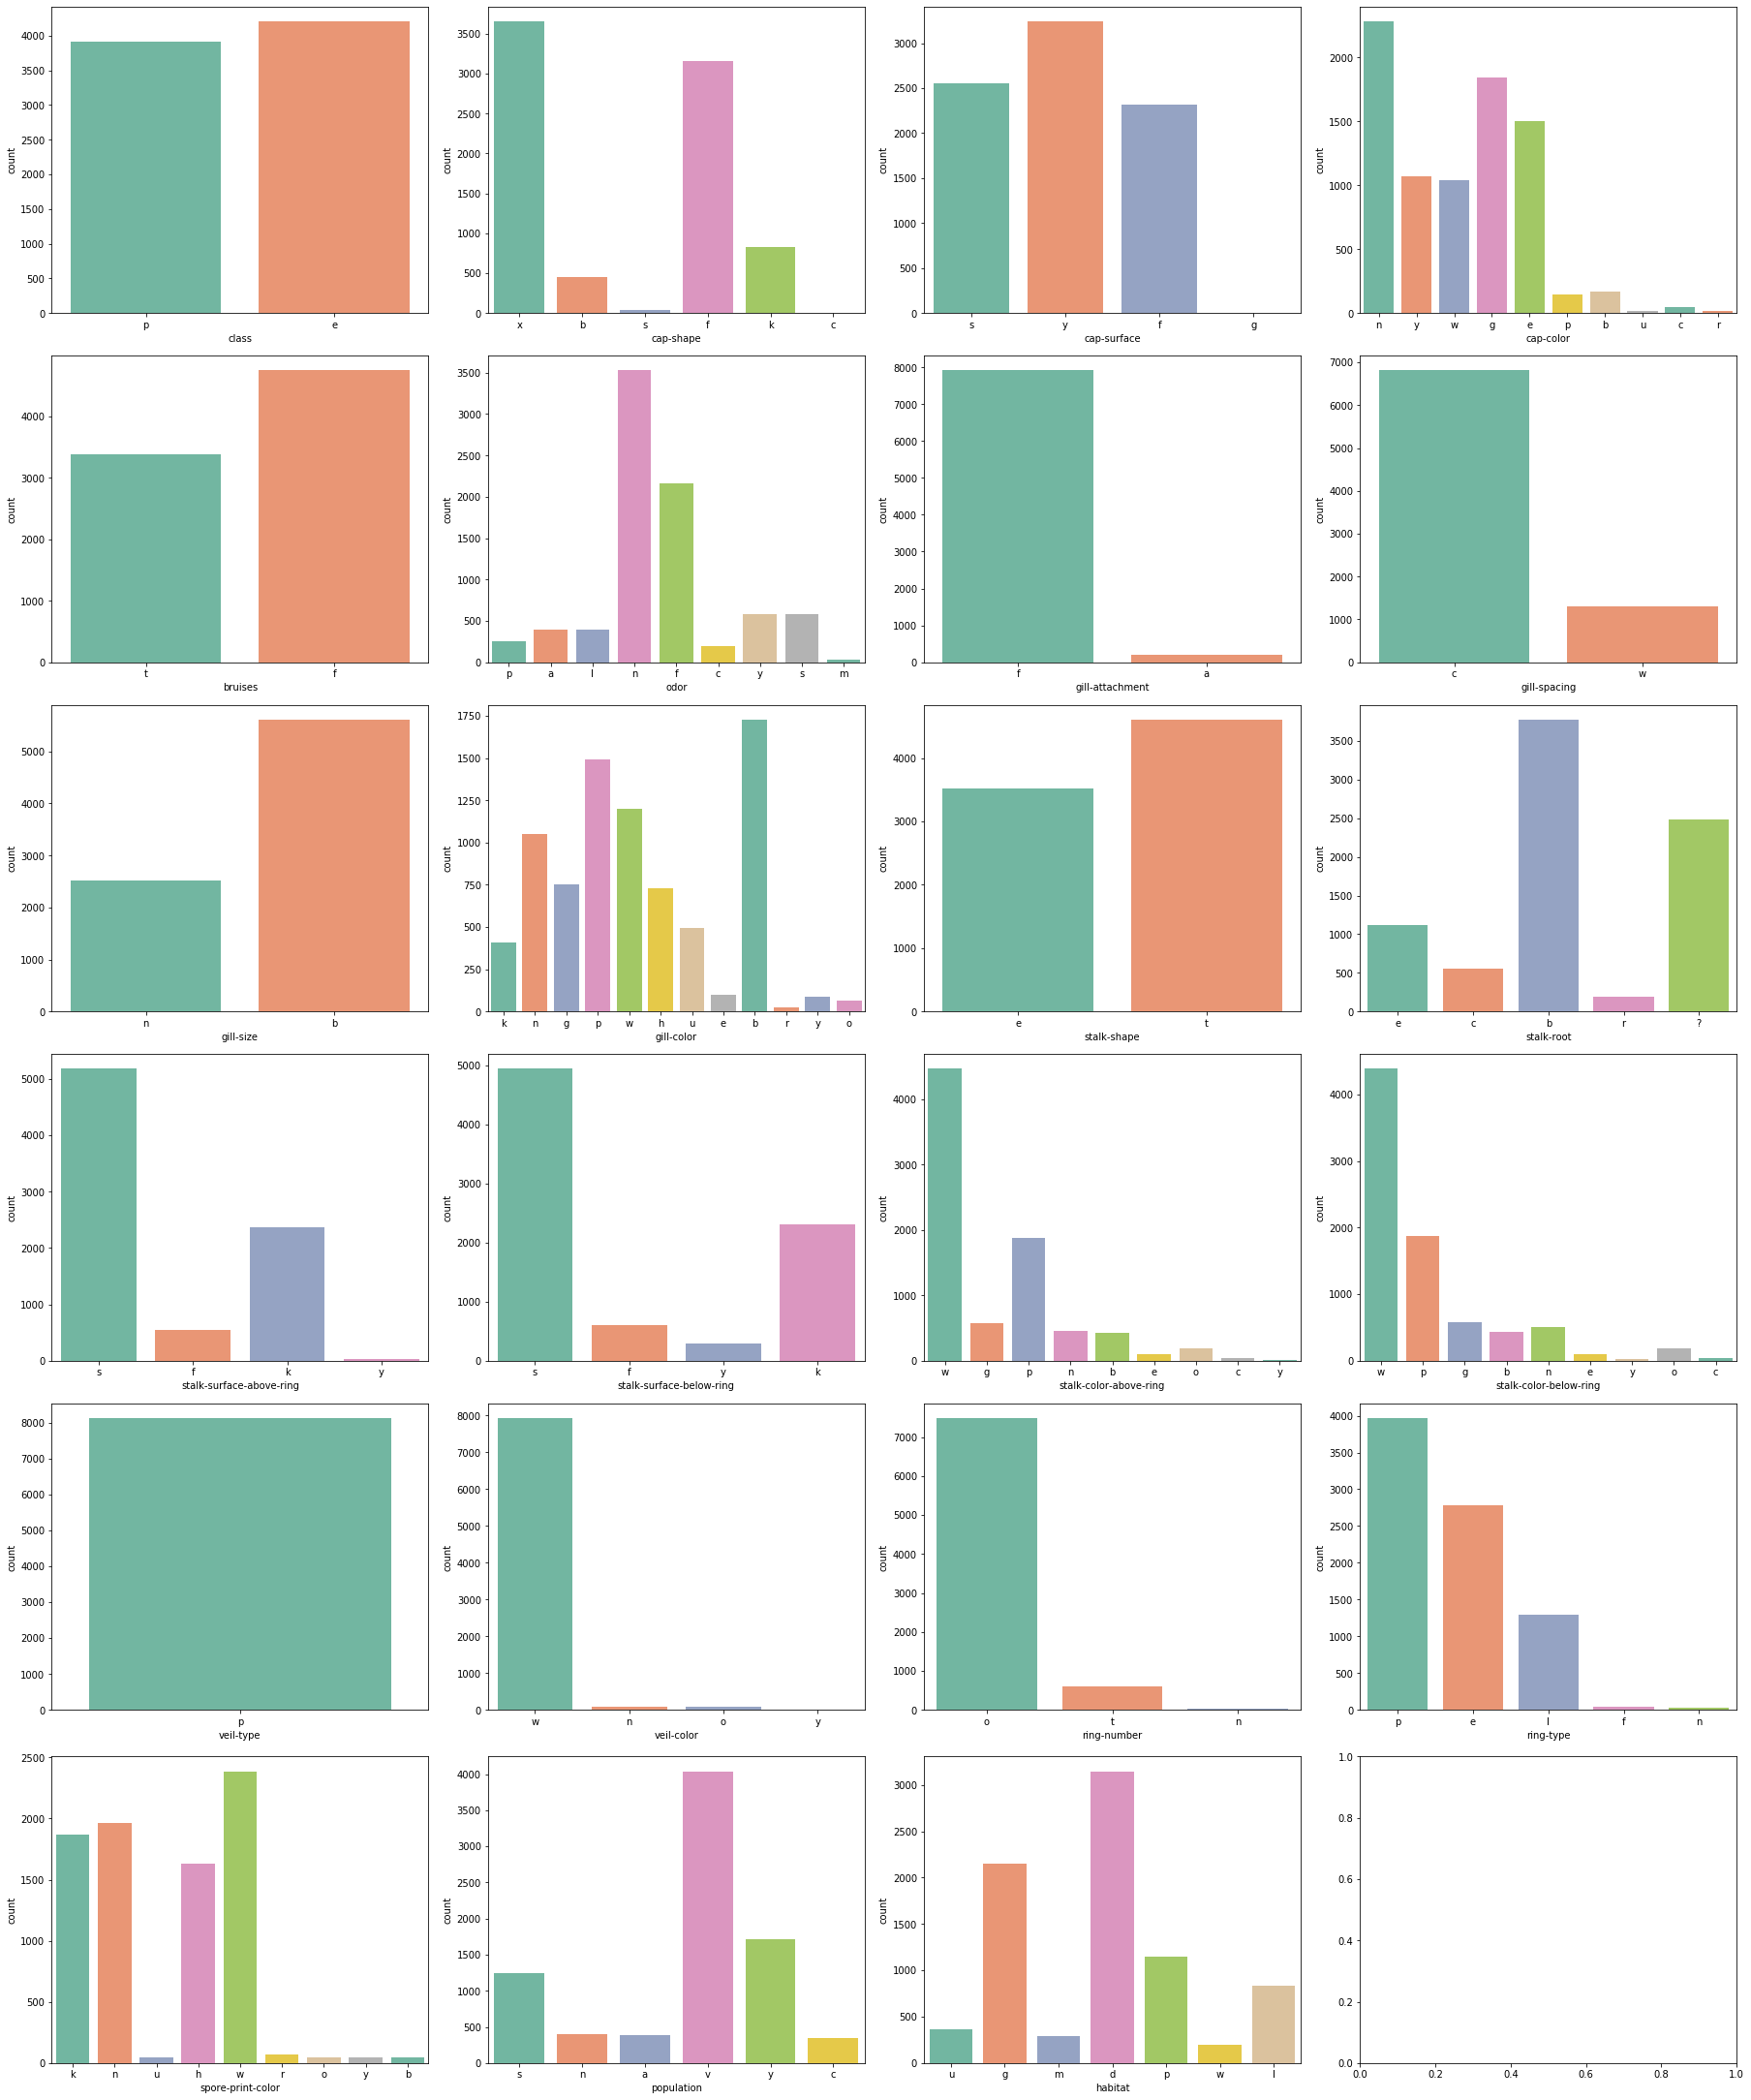

In [7]:
features_countplot(data)

In [8]:
data["stalk-root"]

0       e
1       c
2       c
3       e
4       e
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 8124, dtype: object

In [9]:
len(np.where(data['stalk-root']=='?')[0])

2480

Prethodnom analizom može se uvideti da za atribut stalk-root postoji puno primera koji su labelirani kao missing (?). Kako ti podaci nisu od pomoći, ceo atribut se neće uzimati u obzir. Takođe, atribut veil-type poseduje samo jednu vrednost kroz ceo skup podataka te se ni on neće uzimati u obzir.

In [10]:
data = data.drop(columns = ["stalk-root", "veil-type"])

## 1.1 Transformacija podataka

Kako su svi atributi kategorički, neophodno je prevesti ih u one-hot encoding oblik.

In [11]:
data_transformed = pd.DataFrame()
for column in data.columns:
    if column == 'class':
        continue
    one_hot = pd.get_dummies(data[column])
    old_columns = one_hot.columns
    one_hot.columns = [col + "_" + column for col in old_columns]
    data_transformed = pd.concat([data_transformed, one_hot], axis=1, sort=False)

In [12]:
labels = data["class"]
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [13]:
data_transformed

,b_cap-shape,c_cap-shape,f_cap-shape,k_cap-shape,s_cap-shape,x_cap-shape,f_cap-surface,g_cap-surface,s_cap-surface,y_cap-surface,...,s_population,v_population,y_population,d_habitat,g_habitat,l_habitat,m_habitat,p_habitat,u_habitat,w_habitat
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


## 1.2 Odabir atributa


Kako ima puno atributa od kojih neki mogu biti redudantni jer su visoko korelisani, vrši se dodatna redukcija i analiza.


In [14]:
def df_corr_coeff(df, coeff):
    table = []
    upper = df.corr().where(np.triu(np.ones(df.corr().shape), k=1).astype(np.bool))
    for col in df.corr().columns:
        for i, val in enumerate(list(upper[col].dropna().values)):
            if abs(val) >= coeff:
                table.append((upper[col].dropna().name, df.corr().columns[i], val))
    table = pd.DataFrame(table, columns=["Feature 1", "Feature 2", "Correlation"])
    return table

In [15]:
df_corr_coeff(data_transformed, 0.9)

,Feature 1,Feature 2,Correlation
0,t_bruises,f_bruises,-1.000000
1,f_gill-attachment,a_gill-attachment,-1.000000
2,w_gill-spacing,c_gill-spacing,-1.000000
3,n_gill-size,b_gill-size,-1.000000
4,t_stalk-shape,e_stalk-shape,-1.000000
5,c_stalk-color-above-ring,m_odor,1.000000
6,o_stalk-color-above-ring,a_gill-attachment,0.955097
7,o_stalk-color-above-ring,f_gill-attachment,-0.955097
8,c_stalk-color-below-ring,m_odor,1.000000
9,c_stalk-color-below-ring,c_stalk-color-above-ring,1.000000


In [16]:
def del_perfect_corr(df):
    
    features = df_corr_coeff(df, 1)
    if features.shape[0] == 0:
        return df
    features_groups = [{features["Feature 1"][0], features["Feature 2"][0]}]
    for i in range(1, features.shape[0]):
        if features["Feature 1"][i] not in set.union(*features_groups) and features["Feature 2"][i] not in set.union(*features_groups):
            features_groups.append({features["Feature 1"][i], features["Feature 2"][i]})
        elif features["Feature 1"][i] in set.union(*features_groups) and features["Feature 2"][i] in set.union(*features_groups):
            continue
        else:
            for group in features_groups:
                if features["Feature 1"][i] in group or features["Feature 2"][i] in group:
                    group.add(features["Feature 1"][i])
                    group.add(features["Feature 2"][i])
                    break
    for group in features_groups:
        group.pop()
        df = df.drop(group, axis=1)
        print(group)        
    return df

In [17]:
df2 = del_perfect_corr(data_transformed)

{'f_bruises'}
{'f_gill-attachment'}
{'w_gill-spacing'}
{'e_stalk-shape'}
{'m_odor', 'n_ring-type', 'c_stalk-color-above-ring', 'n_ring-number'}
{'o_stalk-color-below-ring'}
{'y_veil-color'}


In [18]:
df2

,b_cap-shape,c_cap-shape,f_cap-shape,k_cap-shape,s_cap-shape,x_cap-shape,f_cap-surface,g_cap-surface,s_cap-surface,y_cap-surface,...,s_population,v_population,y_population,d_habitat,g_habitat,l_habitat,m_habitat,p_habitat,u_habitat,w_habitat
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Sada možemo vizualizovati raspodelu različitih atributa po klasama i odatle steći uvid u to koji atribut će biti najdistinktivniji. Jedan od njih jeste *odor*.

In [19]:

def feature_target_dist(df):
    fig, axs = plt.subplots(5, 4, figsize=(20,20), constrained_layout=True)
    for i, f in enumerate(df.drop("class", axis=1).columns):
        sns.countplot(x=f, hue="class", data=df, ax=axs[i//4][i%4], palette="Set2")
    plt.show()

In [20]:
full_data = data
full_data["class"] = labels

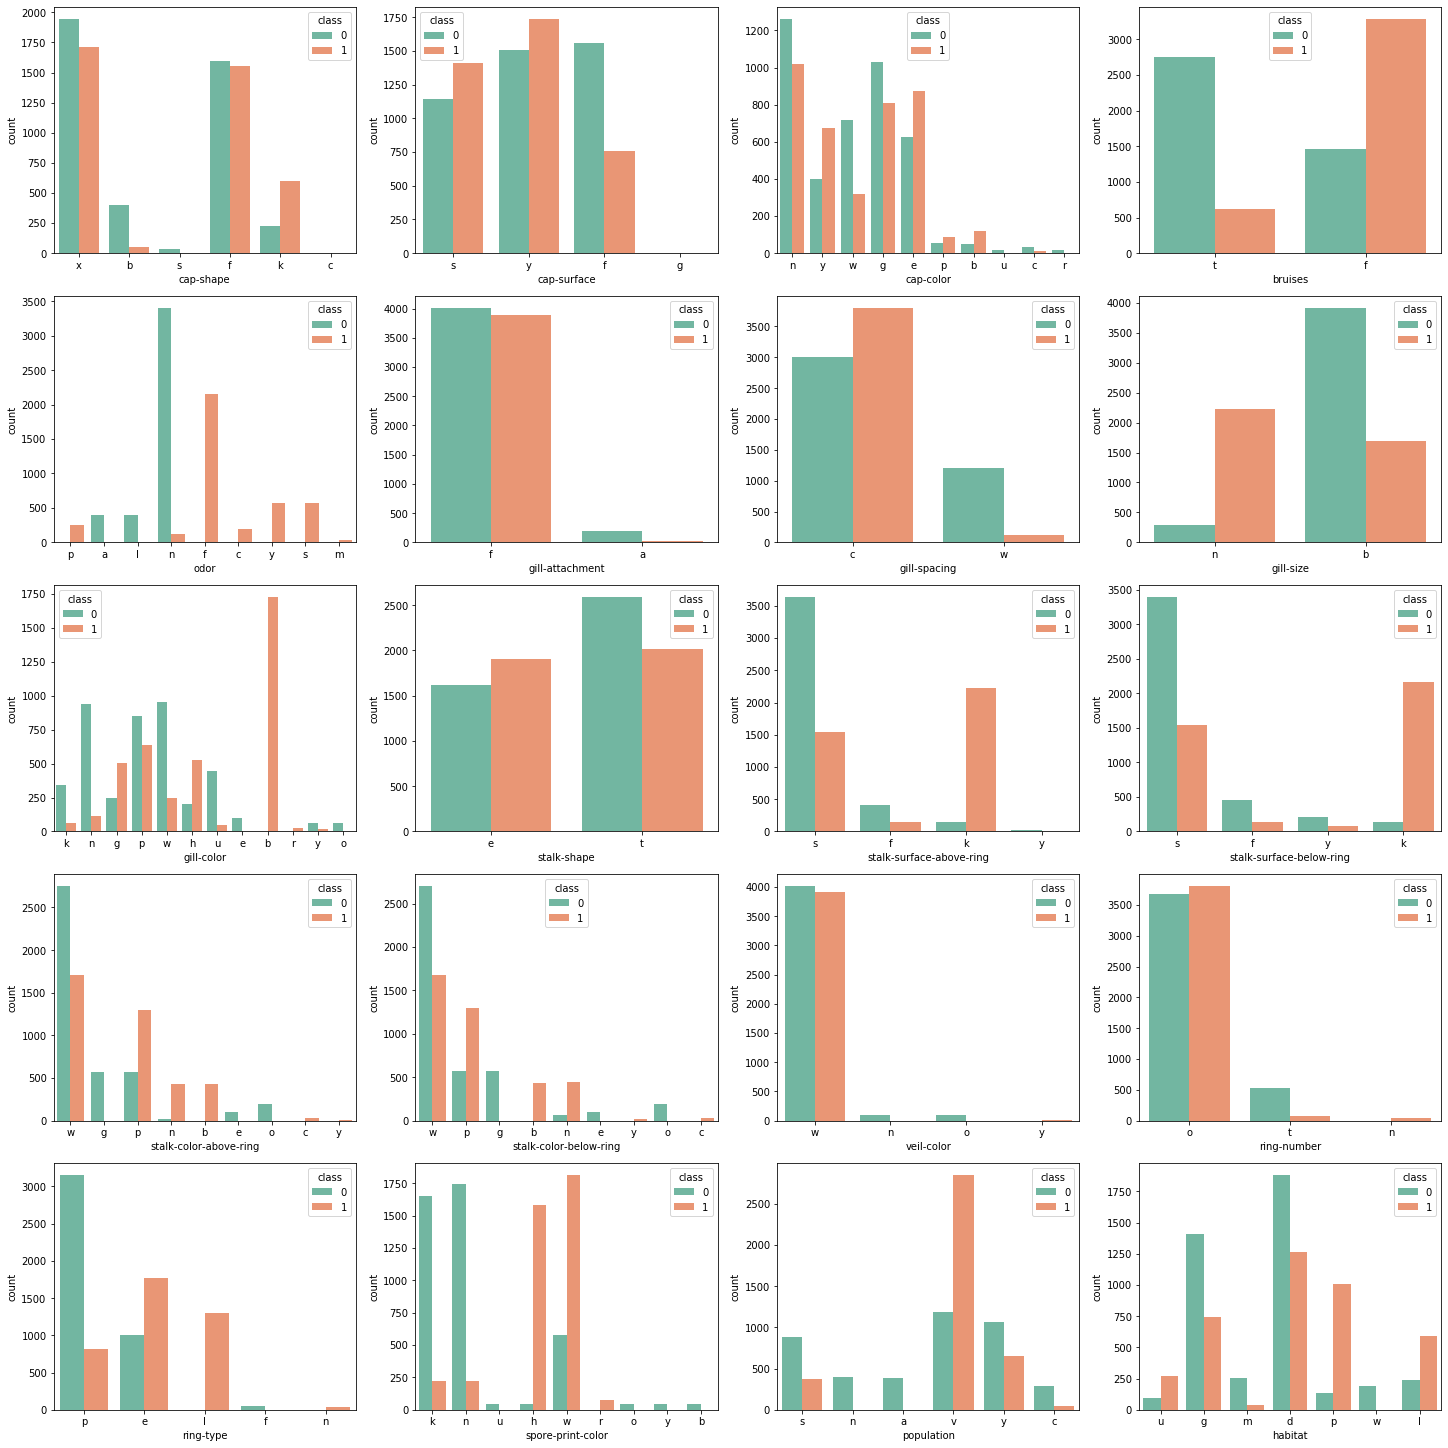

In [21]:
feature_target_dist(full_data)

Različite statističke metrike sada mogu da nam ukažu na to koji atributi su od najvećeg značaja za klasifikaciju.

In [22]:

def stat_scores(X, y, n):
    
    mi = mutual_info_classif(X, y, random_state=10)
    rfi = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=10).fit(X, y).feature_importances_
    eti = ExtraTreesClassifier(n_estimators=100, random_state=10).fit(X, y).feature_importances_

    plt.title("Mutual Information stats")
    plot_feature_rank(X, mi, n)
    
    plt.title("Random Forest Importance")
    plot_feature_rank(X, rfi, n)
    
    plt.title("Extra Trees Importance")
    plot_feature_rank(X, eti, n)


def plot_feature_rank(X, stat, n):
    pd.Series(stat).sort_values(ascending=False).nlargest(n).plot.bar(figsize = (16,4))
    plt.xticks(range(0,n), X.columns[pd.Series(stat).sort_values(ascending=False).nlargest(n).index], rotation=20)
    plt.show()

In [23]:
X, y = data_transformed, labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

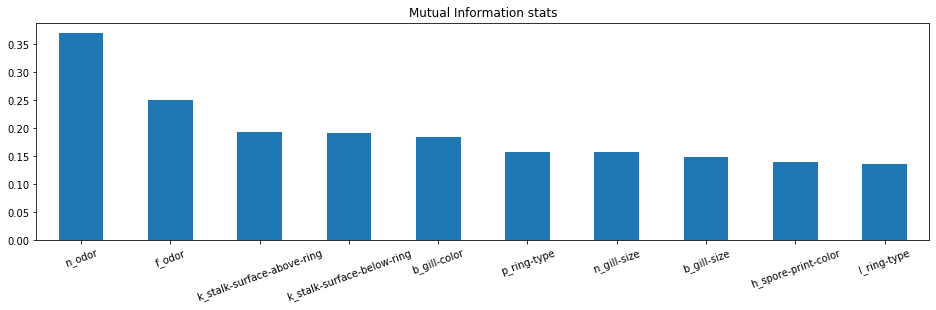

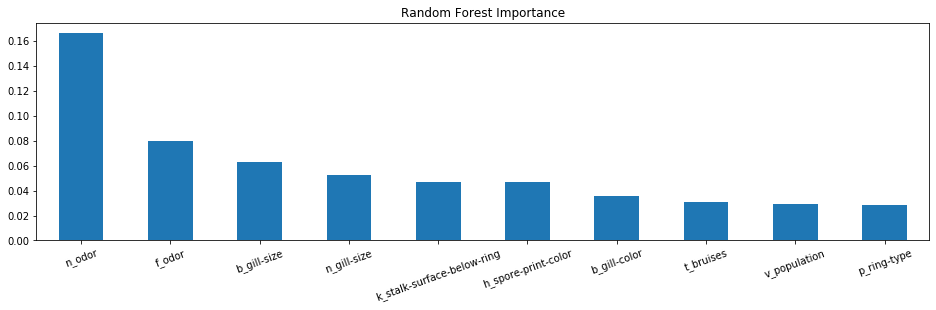

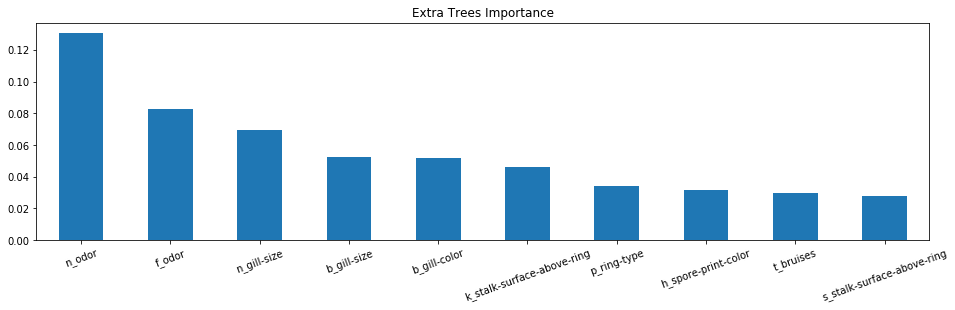

In [24]:
stat_scores(X_train, y_train, 10)

## 2. Model

Prvi model koji je isproban jeste stablo odlučivanja, koji je veoma interpretabilan. pored same vizualizacije stabla, možemo prikazati i bitnost atributa preko ovog klasifikatora.

In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn.tree import *
from sklearn import tree


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
features = X.columns

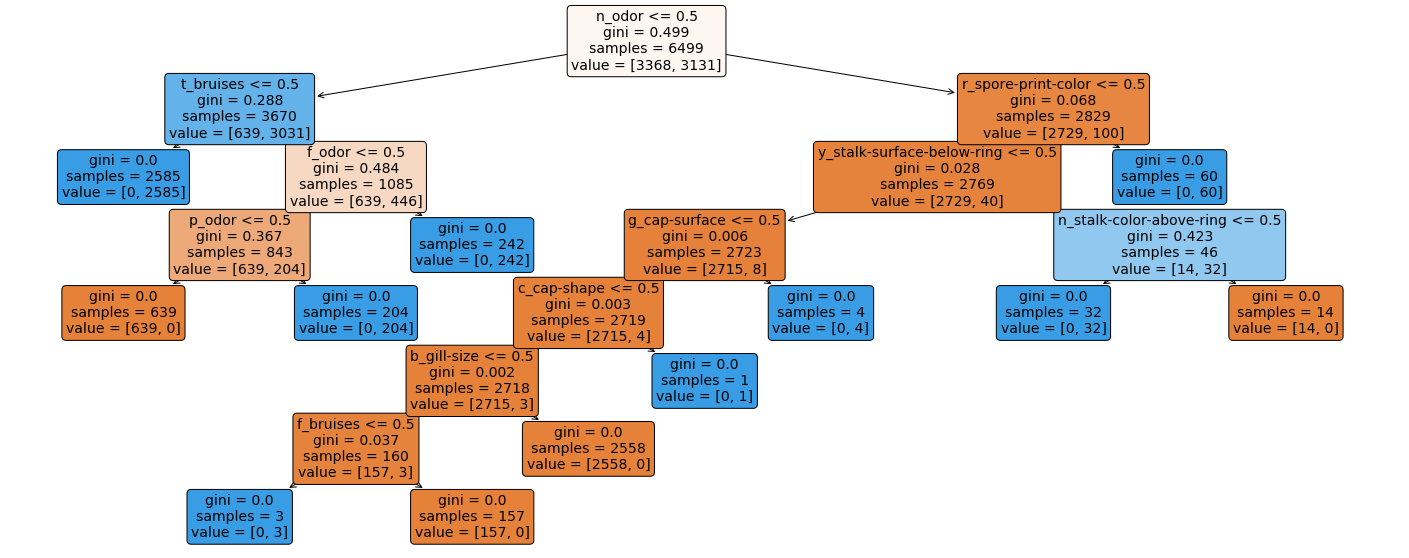

In [28]:
plt.figure(figsize=(25,10))
a = tree.plot_tree(dt,
                    feature_names = features,
                    filled=True,  
                    rounded=True, 
                    fontsize=14)

In [29]:
y_predict = dt.predict(X_test)

In [30]:
importance_dict = {}

Feature: n_odor, Score: 0.6153025009273155
Feature: t_bruises, Score: 0.16336456016753426
Feature: p_odor, Score: 0.09530042501489422
Feature: f_odor, Score: 0.06658112913821818
Feature: r_spore-print-color, Score: 0.03515554257601554
Feature: y_stalk-surface-below-ring, Score: 0.013377720928727197
Feature: n_stalk-color-above-ring, Score: 0.006002215290172767
Feature: g_cap-surface, Score: 0.0024543370124287503
Feature: f_bruises, Score: 0.0018142298615636578
Feature: c_cap-shape, Score: 0.0006147129952946629
Feature: b_gill-size, Score: 3.262608783534711e-05
Feature: b_cap-shape, Score: 0.0
Feature: f_cap-shape, Score: 0.0
Feature: k_cap-shape, Score: 0.0
Feature: s_cap-shape, Score: 0.0
Feature: x_cap-shape, Score: 0.0
Feature: f_cap-surface, Score: 0.0
Feature: s_cap-surface, Score: 0.0
Feature: y_cap-surface, Score: 0.0
Feature: b_cap-color, Score: 0.0
Feature: c_cap-color, Score: 0.0
Feature: e_cap-color, Score: 0.0
Feature: g_cap-color, Score: 0.0
Feature: n_cap-color, Score: 0.

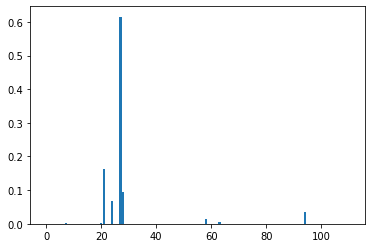

In [31]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
    importance_dict[features[i]] = v
    
sorted_importance_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)}
for key in sorted_importance_dict:
	print('Feature: {}, Score: {}'.format(key, sorted_importance_dict[key]))
    
plt.bar([x for x in range(len(sorted_importance_dict))], importance)
plt.show()

In [32]:
from sklearn.metrics import *

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Ovaj dataset je takav da se njihova pravilnost može lako naučiti pomoću stabala. Treniranje sa različitim modelima je dato u nastavku.

In [54]:
# Importing required classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import *
import xgboost
from sklearn import tree
from sklearn import metrics
# Creating object for each class and storing into the array


def run_clf(data, X_train, X_test, y_train, y_test, name, clf):

    print(name)
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
    print("Model Score : ", clf.score(X_test, y_pred))
    print("Number of mislabeled points from %d points : %d"% (X_test.shape[0], (y_test!= y_pred).sum()))
    scores = cross_val_score(clf, data, labels, cv=10, scoring='accuracy')
    print("Cross validation scores : ", scores.mean())
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    print("Confusion Matrix \n",confusion_matrix)
    classification_report = metrics.classification_report(y_test,y_pred)
    print("Classification Report \n",classification_report)

def run_classifiers(data, labels):

    X, y = data, labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

    classifiers = []
    lr_model= LogisticRegression()
    classifiers.append(("Logistic Regression Classifier", lr_model))
    dt_model = tree.DecisionTreeClassifier()
    classifiers.append(("Decision Tree Classifier", dt_model))
    rf_model = RandomForestClassifier()
    classifiers.append(("Random Forest Classifier", rf_model))
    xgb_model = xgboost.XGBClassifier()
    classifiers.append(("XG Boost Classifier", xgb_model))
    knn_model = KNeighborsClassifier()
    classifiers.append(("KNN Classifier", knn_model))

    for name, clf in classifiers:
        run_clf(data, X_train, X_test, y_train, y_test, name, clf)

    ensamble = VotingClassifier(estimators=classifiers, voting='soft')
    run_clf(X_train, X_test, y_train, y_test, name = 'Ensamble', ensamble)

run_classifiers(df2, labels)

SyntaxError: positional argument follows keyword argument (<ipython-input-54-03c78519190f>, line 50)

Sada isprobavamo klasifikaciju sa smanjenim brojem atributa. Najpre smo simulirali posmatrača koji ima anosmiju, odnosno ne razlikuje mirise. Takođe ovaj atribut je izvučen kao najznačajniji. Rezultati su i bez njega nepogrešivi.

In [34]:
to_remove = []
for col in df2.columns:
    if "odor" in col:
        to_remove.append(col)
df_reduced = df2.drop(columns = to_remove)

In [35]:
run_classifiers(df_reduced, labels)

Logistic Regression Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 11
Cross validation scores :  0.9768521379795079
Confusion Matrix 
 [[834   6]
 [  5 780]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       840
           1       0.99      0.99      0.99       785

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Decision Tree Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 0
Cross validation scores :  0.968265379698132
Confusion Matrix 
 [[840   0]
 [  0 785]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      

Potom je istestiran skup podataka koji sadrži samo podatke o mirisu.

In [36]:
df_odor = df2[to_remove]

In [37]:
run_classifiers(df_odor, labels)

Logistic Regression Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 20
Cross validation scores :  0.9768521379795079
Confusion Matrix 
 [[840   0]
 [ 20 765]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       840
           1       1.00      0.97      0.99       785

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Decision Tree Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 20
Cross validation scores :  0.9564427195996098
Confusion Matrix 
 [[840   0]
 [ 20 765]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       840
           1       1.00      0.97      0.99       785

    accuracy                           0.99      1625
   macro avg       0.99      0.99    

Zanimljivo je i ispitati skup atributa koji opisuju samo boje delova pečurke (nešto što bi se moglo preuzeti sa slika).

In [38]:
colors = []
for col in df2.columns:
    if "color" in col:
        colors.append(col)
df_colors = df2[colors]

In [39]:
run_classifiers(df_colors, labels)

Logistic Regression Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 84
Cross validation scores :  0.9768521379795079
Confusion Matrix 
 [[839   1]
 [ 83 702]]
Classification Report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       840
           1       1.00      0.89      0.94       785

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Decision Tree Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 79
Cross validation scores :  0.968265379698132
Confusion Matrix 
 [[836   4]
 [ 75 710]]
Classification Report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.95       840
           1       0.99      0.90      0.95       785

    accuracy                           0.95      1625
   macro avg       0.96      0.95     

Poslednje ispitivanje izvršeno je za atribute vezane za stanište i populaciju pečuraka. Ovi rezultati su lošiji od prethodnih.

In [40]:
atts = []
for col in df2.columns:
    if ("habitat" in col) or ("population" in col):
        atts.append(col)
df_habitat = df2[atts]

In [41]:
run_classifiers(df_habitat, labels)

Logistic Regression Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 387
Cross validation scores :  0.9768521379795079
Confusion Matrix 
 [[556 284]
 [103 682]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.66      0.74       840
           1       0.71      0.87      0.78       785

    accuracy                           0.76      1625
   macro avg       0.77      0.77      0.76      1625
weighted avg       0.78      0.76      0.76      1625

Decision Tree Classifier
Model Score :  1.0
Number of mislabeled points from 1625 points : 329
Cross validation scores :  0.9564427195996098
Confusion Matrix 
 [[775  65]
 [264 521]]
Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.92      0.82       840
           1       0.89      0.66      0.76       785

    accuracy                           0.80      1625
   macro avg       0.82      0.79  

In [51]:
from sklearn.model_selection import GridSearchCV


def run_grid_search(x_train, y_train, clf, param_grid, cv=5):

    cv_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
    cv_rfc.fit(x_train, y_train)
    return cv_rfc

In [52]:
param_grid = { 
    'n_estimators': [200, 500],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6],
    'criterion' :['gini', 'entropy']
}

clf = RandomForestClassifier()

grid_obj = run_grid_search(X_train, y_train, clf, param_grid)

In [53]:
grid_obj.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}

In [ ]:
best_clf = RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200)


## 3. Zaključak

Ovaj skup podataka je jako lep ilustrativni primer pomoću koga se može realizovati savršena klasifikacija skoro svakom vrstom modela. Nažalost, ovakvi skupovi podataka se ne sreću u realnim problemima. Algoritmi mašinskog učenja su bazirani na statistici i ne postoji mogućnost savršenog aproksimiranja (uvek postoji izvestan šum). Moguće je takođe da novi podaci iz distrubucije pečuraka, ili podaci sa nedostajućim vrednostima, sa našim modelima budu pogrešno klasifikovani.